In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb

import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
data = pd.read_csv('3_final_descriptors.csv')

In [34]:
data

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,gap
0,-1.678373,0.621798,0.194803,-0.108655,-0.431465,-0.548310,-0.188259,0.467344,0.805793,0.521714,...,-0.145778,0.136180,0.149363,0.164955,-0.016354,-0.087396,-0.223456,-0.053401,-0.154213,0.3049
1,2.413777,-0.958577,-0.133933,1.138349,0.149927,0.444823,0.615890,-0.403380,0.622096,0.674860,...,0.254439,-0.197821,0.313852,0.333831,-0.260601,0.096819,0.107580,-0.060317,-0.168268,0.2454
2,-0.689326,-1.815552,0.366853,-0.893817,-1.023382,-0.887666,-1.467653,0.393151,-0.485834,0.648487,...,-0.076939,-0.304443,0.052689,-0.144657,-0.319800,-0.430828,0.393157,0.162784,-0.047986,0.3155
3,-0.657622,0.078718,0.268385,1.087692,-0.315219,0.852714,1.265713,1.010074,-1.600703,-0.044025,...,0.024200,-0.118433,0.043224,-0.158826,0.009597,0.095494,-0.332864,0.121158,0.010691,0.2787
4,-1.840158,0.408121,-0.076951,-0.399845,-0.861435,-0.115383,0.278299,-1.216077,-0.490411,-1.142720,...,-0.101025,0.227344,-0.051856,0.146840,0.038437,0.148012,-0.029966,0.145328,-0.173955,0.3009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.380196,0.932830,0.502603,-0.662665,-1.060167,-0.449531,0.255051,0.651034,0.548531,0.585654,...,-0.326707,-0.021937,0.034166,0.141747,0.075824,0.089052,0.024184,0.054577,-0.123785,0.2568
19996,-2.151819,-0.609588,1.444002,-1.039171,-0.131531,0.484563,0.085359,-0.926206,1.124491,-0.017621,...,0.038963,0.252780,0.134570,0.110769,0.020542,-0.083541,-0.127238,0.071983,0.018793,0.2883
19997,0.878514,-0.808301,-0.739619,-0.396917,-0.648273,0.983900,-0.117932,0.154785,1.307304,0.186188,...,-0.210488,-0.133836,-0.143687,-0.102174,0.142018,0.173342,-0.007651,-0.107551,0.138938,0.2517
19998,-1.047566,0.776880,-0.504467,-0.048459,0.267996,-0.437728,-0.543049,0.203558,0.913371,-0.550616,...,-0.025281,-0.075873,-0.223693,0.013592,-0.002673,-0.056313,0.024907,0.024398,0.022180,0.2768


In [35]:
# Разделим данные на признаки и целевую переменную
X = data.drop('gap', axis=1)
y = data['gap']

print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20000 non-null  float64
 1   1       20000 non-null  float64
 2   2       20000 non-null  float64
 3   3       20000 non-null  float64
 4   4       20000 non-null  float64
 5   5       20000 non-null  float64
 6   6       20000 non-null  float64
 7   7       20000 non-null  float64
 8   8       20000 non-null  float64
 9   9       20000 non-null  float64
 10  10      20000 non-null  float64
 11  11      20000 non-null  float64
 12  12      20000 non-null  float64
 13  13      20000 non-null  float64
 14  14      20000 non-null  float64
 15  15      20000 non-null  float64
 16  16      20000 non-null  float64
 17  17      20000 non-null  float64
 18  18      20000 non-null  float64
 19  19      20000 non-null  float64
 20  20      20000 non-null  float64
 21  21      20000 non-null  float64
 22

In [36]:
# Разделение данных на тренировочную и тестовую выборки с помощью кросс-валидации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#LightGBM

In [37]:
# Определим модель LightGBM
model = lgb.LGBMRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011624 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15810
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 62
[LightGBM] [Info] Start training from score 0.250860


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15810
[LightGBM] [Info] Number of data points in the train set: 18000, number of used features: 62
[LightGBM] [Info] Start training from score 0.251151
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012701 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15810
[LightGBM] [Info] Number of data points in the train set: 18000, number of used features: 62
[LightGBM] [Info] Start training from score 0.251080
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15810
[LightGBM] [Info] Number of data points in the train set: 18000, number of used features: 62
[LightGBM] [Info] Start 

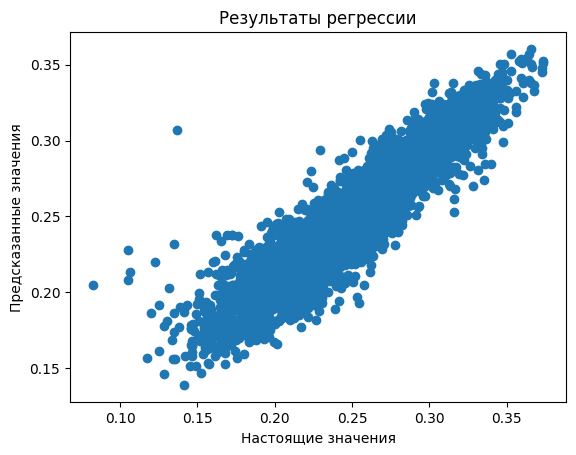

Метрики на тестовой выборке:
MSE: 0.0003095689069796178
RMSE: 0.017594570383490975
MAE: 0.013202840367311631
R2: 0.8647888253202497

Метрики при кросс-валидации:
Среднее MSE: 0.0003171583377582467
Среднее RMSE: 0.01780514164448359
Среднее MAE: 0.013526989408861812
Среднее R2: 0.8599182261868454

Время, затраченное на обучение модели: 1.8407227993011475 секунд


In [38]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели
cv_mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")
print(f"Среднее MSE: {np.mean(cv_mse_scores)}")
print(f"Среднее RMSE: {np.mean(cv_rmse_scores)}")
print(f"Среднее MAE: {np.mean(cv_mae_scores)}")
print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")

# XGBoost

In [39]:
# Определим модель XGBoost
model = xgb.XGBRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

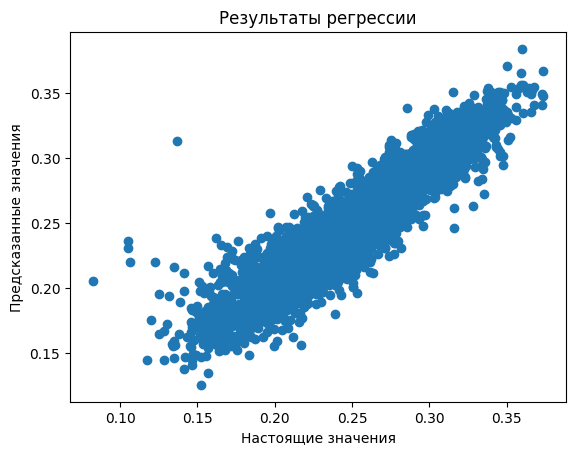

Метрики на тестовой выборке:
MSE: 0.0003041264586191493
RMSE: 0.01743922184672095
MAE: 0.01308444892988801
R2: 0.8671659369078849

Метрики при кросс-валидации:
Среднее MSE: 0.00031564211305763377
Среднее RMSE: 0.01776184832198058
Среднее MAE: 0.013394906370204091
Среднее R2: 0.8606267309072383

Время, затраченное на обучение модели: 3.99975848197937 секунд


In [40]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели
cv_mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")
print(f"Среднее MSE: {np.mean(cv_mse_scores)}")
print(f"Среднее RMSE: {np.mean(cv_rmse_scores)}")
print(f"Среднее MAE: {np.mean(cv_mae_scores)}")
print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")

# Gradient Boosting

In [41]:
# Определим модель
model = GradientBoostingRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

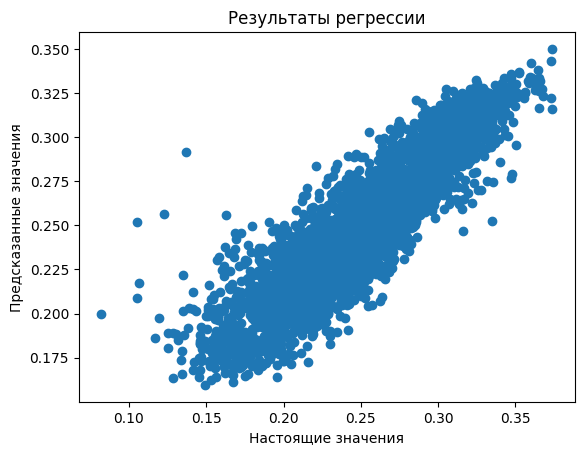

Метрики на тестовой выборке:
MSE: 0.0004414110912450559
RMSE: 0.021009785606832258
MAE: 0.016324221244193644
R2: 0.8072037894689338

Метрики при кросс-валидации:
Среднее MSE: 0.00045172585464553424
Среднее RMSE: 0.021250249964130614
Среднее MAE: 0.01645899408487434
Среднее R2: 0.8005298259044963

Время, затраченное на обучение модели: 44.40083456039429 секунд


In [42]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели
cv_mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(cv_mse_scores)
cv_mae_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")
print(f"Среднее MSE: {np.mean(cv_mse_scores)}")
print(f"Среднее RMSE: {np.mean(cv_rmse_scores)}")
print(f"Среднее MAE: {np.mean(cv_mae_scores)}")
print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")

# Выбор модели

- LGBM: r2 = 0.86, time = 1.84 s
- XGB:  r2 = 0.86, time = 4 s
- Gradient Boosting : r2 = 0.80, time = 44,4 s

Видно, что метрики у первых двух моделей отличаются не сильно (на тысячные), при этом модель Gradient Boosting показывает более плохие результаты, при этом требуя на порядок больше времени на обучение.

Учитывая примерную равность метрик первых двух моделей, выбор модели для оптимизации основывается на потраченном времени. На обучение модели LGBM тратится примерно в 2 раза меньше времени (но она показывает результат немного ниже если не округлять), поэтому я выбрал ее.

# Оптимизация с Grid Search

In [43]:
from sklearn.model_selection import GridSearchCV

In [46]:
# Создаем объект модели LightGBM
model = lgb.LGBMRegressor()

# Задаем сетку гиперпараметров для перебора
param_grid = {
    'num_leaves': [30, 50],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
}
# Создание объекта GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Обучение модели с оптимизацией гиперпараметров
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Получение лучших параметров
best_params = grid_search.best_params_

# Предсказание на тестовой выборке с лучшей моделью
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Вычисление метрик точности
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Лучшие параметры:", best_params)
print("\nМетрики на тестовой выборке с лучшей моделью:")
print(f"R2: {r2}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели с оптимизированными гиперпараметрами: {training_time} секунд")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15810
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 62
[LightGBM] [Info] Start training from score 0.250860
Лучшие параметры: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 50}

Метрики на тестовой выборке с лучшей моделью:
R2: 0.8884056415357082

Время, затраченное на обучение модели с оптимизированными гиперпараметрами: 106.38467335700989 секунд


После оптимизации параметров метрика r2 увеличилась на 0,028

---

